[0.         0.07142493 0.14284985 0.21427478 0.28569971 0.35712464
 0.42854956 0.49997449 0.57139942 0.64282435 0.71424927 0.7856742
 0.85709913 0.92852406 0.99994898 1.07137391 1.14279884 1.21422377
 1.28564869 1.35707362 1.42849855 1.49992348 1.5713484  1.64277333
 1.71419826 1.78562318 1.85704811 1.92847304 1.99989797 2.07132289
 2.14274782 2.21417275 2.28559768 2.3570226  2.42844753 2.49987246
 2.57129739 2.64272231 2.71414724 2.78557217 2.8569971  2.92842202
 2.99984695 3.07127188 3.14269681 3.21412173 3.28554666 3.35697159
 3.42839651 3.49982144 3.57124637 3.6426713  3.71409622 3.78552115
 3.85694608 3.92837101 3.99979593 4.07122086 4.14264579 4.21407072
 4.28549564 4.35692057 4.4283455  4.49977043 4.57119535 4.64262028
 4.71404521 4.78547014 4.85689506 4.92831999 4.99974492 5.07116984
 5.14259477 5.2140197  5.28544463 5.35686955 5.42829448 5.49971941
 5.57114434 5.64256926 5.71399419 5.78541912 5.85684405 5.92826897
 5.9996939  6.07111883 6.14254376 6.21396868 6.28539361 6.35681

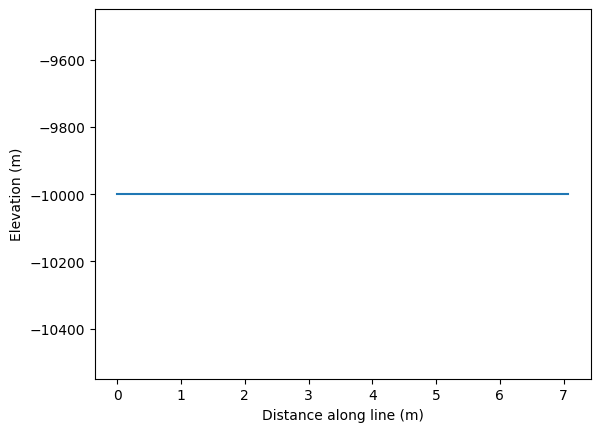

In [4]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from rasterio.sample import sample_gen

def extract_elevation_profile(raster_file, line_coords, num_samples=100):
    with rasterio.open(raster_file) as src:
        line = LineString(line_coords)
        distances = np.linspace(0, line.length, num_samples)
        points = [line.interpolate(distance) for distance in distances]

        elevations = [
            next(sample_gen(src, [point.coords[0] for point in points]))[0]
        ]

    return distances, elevations

def plot_elevation_profile(distances, elevations):
    if len(elevations) == 1:
        elevations = elevations * len(distances)
    plt.plot(distances, elevations)
    plt.xlabel('Distance along line (m)')
    plt.ylabel('Elevation (m)')
    plt.show()

raster_file = 'AK22_Lamb_be/LAMB_GEG_01M.tif'
line_coords = [(100.0, 50.0), (105.0, 55.0)]
distances, elevations = extract_elevation_profile(raster_file, line_coords)
print(distances, elevations)
plot_elevation_profile(distances, elevations)
